In [1]:
!pip install nxviz

# Analise de Palavras Atrações

A primeira parte do trabalho faz uma pesquisa dos comentarios das atrações para fazer analíse dela posteriormente nos grafos

In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
Url_Inicial = 'https://www.tripadvisor.com.br/Attractions-g303518-Activities-Natal_State_of_Rio_Grande_do_Norte.html#ATTRACTION_SORT_WRAPPER'

In [4]:
def listar_links():
    for atração in atrações:
        url = atração.get('href')
        lista_das_URL.append(url)
        
def pegar_as_paginas():
    for a in lista_das_URL:
        base = "https://www.tripadvisor.com.br"
        if(a.find("#REVIEWS") != -1):
            lista_das_atrações_URL.append(base+a)

In [5]:
lista_das_URL = [] #versão bagunçada
lista_das_atrações_URL = []

response = requests.get(Url_Inicial)
content = response.content
soup = BeautifulSoup(content, "html.parser")   
atrações = soup.find_all('a', href=True)
listar_links()
pegar_as_paginas()

In [6]:
listas_de_comentarios = []
lista_dos_comentarios = []
Nomes_das_atrações = []
Geocoding=[]






base = "https://www.tripadvisor.com.br"

Nomes_das_atrações.append("Palavra")

for atração in lista_das_atrações_URL:
    Url = atração 
    response = requests.get(Url)
    content = response.content
    soup = BeautifulSoup(content, "html.parser")
    nome = soup.find('h1', class_="heading_title")
    Nomes_das_atrações.append(nome.text)
    #Nomes_das_atrações.append(nome.text)
    
    rua=soup.find_all('span', class_="street-address")
    extend=soup.find_all('span', class_="extended-address")
    local=soup.find_all('span', class_="locality")
    pais=soup.find_all('span', class_="country-name")
    #endereco=rua+extend+local+pais
    #print(len(local))
    if(len(rua)>0 and len(extend)>0 and len(local)>0 and len(pais)>0 ):
        endereco=str(rua[0])+" "+str(extend[0])+" "+str(local[0])+" "+str(pais[0])
        #print(endereco)
        endereco=endereco.replace('<span class="street-address">', "")
        endereco=endereco.replace('</span>', "")
        endereco=endereco.replace('<span class="locality">', "")
        endereco=endereco.replace('<span class="extended-address">', "")
        endereco=endereco.replace('<span class="country-name">', "")
        #print(endereco)
    if(len(rua)<=0 and len(extend)>0 and len(local)>0 and len(pais)>0 ):
        endereco=str(extend[0])+" "+str(local[0])+" "+str(pais[0])
        #print(endereco)
        endereco=endereco.replace('<span class="street-address">', "")
        endereco=endereco.replace('</span>', "")
        endereco=endereco.replace('<span class="locality">', "")
        endereco=endereco.replace('<span class="extended-address">', "")
        endereco=endereco.replace('<span class="country-name">', "")
        #print(endereco)
        
    if(len(rua)>0 and len(extend)<=0 and len(local)>0 and len(pais)>0 ):
        endereco=str(rua[0])+" "+str(local[0])+" "+str(pais[0])
        #print(endereco)
        endereco=endereco.replace('<span class="street-address">', "")
        endereco=endereco.replace('</span>', "")
        endereco=endereco.replace('<span class="locality">', "")
        endereco=endereco.replace('<span class="extended-address">', "")
        endereco=endereco.replace('<span class="country-name">', "")
        #print(endereco)
    if(len(rua)>0 and len(extend)>0 and len(local)<=0 and len(pais)>0 ):
        endereco=str(rua[0])+" "+str(extend[0])+" "+str(pais[0])
        #print(endereco)
        endereco=endereco.replace('<span class="street-address">', "")
        endereco=endereco.replace('</span>', "")
        endereco=endereco.replace('<span class="locality">', "")
        endereco=endereco.replace('<span class="extended-address">', "")
        endereco=endereco.replace('<span class="country-name">', "")
        #print(endereco)
    if(len(rua)>0 and len(extend)>0 and len(local)>0 and len(pais)<=0 ):
        endereco=str(rua[0])+" "+str(extend[0])+" "+str(local[0])
        #print(endereco)
        endereco=endereco.replace('<span class="street-address">', "")
        endereco=endereco.replace('</span>', "")
        endereco=endereco.replace('<span class="locality">', "")
        endereco=endereco.replace('<span class="extended-address">', "")
        endereco=endereco.replace('<span class="country-name">', "")
        #print(endereco)
    if(len(rua)<=0 and len(extend)<=0 and len(local)>0 and len(pais)>0 ):
        endereco=str(local[0])+" "+str(pais[0])
        #print(endereco)
        endereco=endereco.replace('<span class="street-address">', "")
        endereco=endereco.replace('</span>', "")
        endereco=endereco.replace('<span class="locality">', "")
        endereco=endereco.replace('<span class="extended-address">', "")
        endereco=endereco.replace('<span class="country-name">', "")
        #print(endereco)
    if(len(rua)<=0 and len(extend)>0 and len(local)<=0 and len(pais)>0 ):
        endereco=str(extend[0])+" "+str(pais[0])
        #print(endereco)
        endereco=endereco.replace('<span class="street-address">', "")
        endereco=endereco.replace('</span>', "")
        endereco=endereco.replace('<span class="locality">', "")
        endereco=endereco.replace('<span class="extended-address">', "")
        endereco=endereco.replace('<span class="country-name">', "")
        #print(endereco)
    if(len(rua)<=0 and len(extend)>0 and len(local)>0 and len(pais)<=0 ):
        endereco=str(extend[0])+" "+str(local[0])
        
    if(len(rua)<=0 and len(extend)<=0 and len(local)<=0 and len(pais)>0 ):
        endereco=str(extend[0])+" "+str(local[0])

    Geocoding.append(endereco)
    
    for i in range(10):
        try:
        
            response = requests.get(Url)
            content = response.content
            soup = BeautifulSoup(content, "html.parser")
            comentario = soup.find_all('p', class_="partial_entry")
            
            #print(comentario)
            for c in comentario:
                lista_dos_comentarios.append(c.text)
            proxima = soup.find('a', class_="nav next arrowNav taLnk")
            print(Url)

            Url = base + proxima.get('href')
            #print(i)
        except AttributeError:
            break
    print("pegou uma lista de: " + atração)
    listas_de_comentarios.append(lista_dos_comentarios)
    lista_dos_comentarios = []

https://www.tripadvisor.com.br/Attraction_Review-g303518-d313960-Reviews-Dunas_de_Genipabu-Natal_State_of_Rio_Grande_do_Norte.html#REVIEWS
https://www.tripadvisor.com.br/Attraction_Review-g303518-d313960-Reviews-or10-Dunas_de_Genipabu-Natal_State_of_Rio_Grande_do_Norte.html#REVIEWS
https://www.tripadvisor.com.br/Attraction_Review-g303518-d313960-Reviews-or20-Dunas_de_Genipabu-Natal_State_of_Rio_Grande_do_Norte.html#REVIEWS
https://www.tripadvisor.com.br/Attraction_Review-g303518-d313960-Reviews-or30-Dunas_de_Genipabu-Natal_State_of_Rio_Grande_do_Norte.html#REVIEWS
https://www.tripadvisor.com.br/Attraction_Review-g303518-d313960-Reviews-or40-Dunas_de_Genipabu-Natal_State_of_Rio_Grande_do_Norte.html#REVIEWS
https://www.tripadvisor.com.br/Attraction_Review-g303518-d313960-Reviews-or50-Dunas_de_Genipabu-Natal_State_of_Rio_Grande_do_Norte.html#REVIEWS
https://www.tripadvisor.com.br/Attraction_Review-g303518-d313960-Reviews-or60-Dunas_de_Genipabu-Natal_State_of_Rio_Grande_do_Norte.html#REVIE

In [7]:
lista_de_termos = []
lista_de_termos.append("lind")
lista_de_termos.append("incrível")
lista_de_termos.append("maravilhos")
lista_de_termos.append("pessim")
lista_de_termos.append("horrivel")
lista_de_termos.append("filh")
lista_de_termos.append("barato")
lista_de_termos.append("bom")
lista_de_termos.append("delicios")
lista_de_termos.append("protetor solar")
lista_de_termos.append("família")
lista_de_termos.append("promoção")
lista_de_termos.append("desconto")
lista_de_termos.append("sozinh")
lista_de_termos.append("aventura")
lista_de_termos.append("natureza")
lista_de_termos.append("interessante")


In [8]:
listas_de_resultados = []
lista_de_resultados = []
i = 0

for termo in lista_de_termos:
    lista_de_resultados.append(termo)
    for lista in listas_de_comentarios:
        contador = 0
        for comentario in lista:
            if(comentario.find(termo) != -1):
                contador+=1
        lista_de_resultados.append(contador)
    listas_de_resultados.append(lista_de_resultados)
    lista_de_resultados = []

print(listas_de_resultados)

[['lind', 29, 27, 26, 30, 7, 1, 0, 0, 18, 11, 41, 11, 1, 0, 0, 1, 29, 27, 26, 30, 29, 27, 26, 30, 18, 21, 23, 31, 24, 25, 11, 41, 18, 0, 36, 20, 33, 14, 15, 19, 23, 34, 8, 6, 10, 16, 14], ['incrível', 5, 0, 2, 3, 1, 1, 0, 0, 4, 0, 1, 0, 1, 0, 0, 0, 5, 0, 2, 3, 5, 0, 2, 3, 4, 1, 5, 2, 1, 3, 0, 1, 1, 1, 3, 4, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0], ['maravilhos', 15, 15, 12, 13, 2, 1, 2, 0, 7, 5, 7, 1, 1, 1, 0, 0, 15, 15, 12, 13, 15, 15, 12, 13, 7, 11, 11, 7, 12, 20, 5, 7, 10, 4, 12, 9, 13, 9, 7, 9, 6, 9, 3, 1, 5, 5, 9], ['pessim', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], ['horrivel', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ['filh', 1, 0, 3, 0, 0, 1, 5, 1, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 3, 0, 1, 0, 3, 0, 2, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 3, 2, 1, 0, 1, 0, 0, 0, 3], ['barato', 0, 2, 1, 0,

In [9]:
import pandas as pd
Dados = pd.DataFrame.from_records(listas_de_resultados, columns=Nomes_das_atrações)

Dados = Dados.loc[:,~Dados.columns.duplicated()]


Dados.to_csv("webScrap100.csv",index=False, sep=",",  encoding='utf-8')


In [10]:
Dados

,Palavra,Dunas de Genipabu,Parque das Dunas,Praia Camurupim,Parrachos de Maracajaú,Palácio Potengi (Pinacoteca Potiguar),Museu Câmara Cascudo,Museu do Brinquedo Popular,Museu de Ciências Morfológicas,Lagoa de Jacumã,...,Forte dos Reis Magos,Praia de Pirangi do Norte,Praia de Pitangui,Praia Pirangi do Sul,Praia de Búzios,Centro de Artesanato de Ponta Negra,Centro de Lançamento da Barreira do Inferno,Catedral Metropolitana,Praia da Redinha,Praia Pitangui
0,lind,29,27,26,30,7,1,0,0,18,...,14,15,19,23,34,8,6,10,16,14
1,incrível,5,0,2,3,1,1,0,0,4,...,1,0,0,0,0,0,0,1,1,0
2,maravilhos,15,15,12,13,2,1,2,0,7,...,9,7,9,6,9,3,1,5,5,9
3,pessim,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,horrivel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,filh,1,0,3,0,0,1,5,1,2,...,1,3,2,1,0,1,0,0,0,3
6,barato,0,2,1,0,0,0,0,0,1,...,0,2,0,0,1,3,0,0,0,0
7,bom,17,14,7,8,2,9,2,2,17,...,6,11,17,6,12,24,8,4,8,16
8,delicios,1,4,4,1,0,0,0,0,3,...,0,1,4,3,1,1,0,0,6,4
9,protetor solar,2,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Criação do grafo
Inicialmente, criamos apenas os vértices do grafo, sendo estes os adjetivos analisados através do scraping dos comentários de cada página.

In [11]:
import networkx as nx

G=nx.Graph()


G.add_node("lind")
G.add_node("incrível")
G.add_node("maravilhos")
G.add_node("péssim")
G.add_node("horrível")
G.add_node("filh")
G.add_node("barato")
G.add_node("bom")
G.add_node("delicios")
G.add_node("protetor solar")
G.add_node("família")
G.add_node("promoção")
G.add_node("desconto")
G.add_node("sozinh")
G.add_node("aventura")
G.add_node("natureza")
G.add_node("interessante")

## Fazendo as ligações
Em seguidas, passamos por cada coluna da estrutura panda criando arestas entre os lugares e os adjetivos a eles associados, atribuindo como peso a quantidade de vezes que a palavra foi citada.

In [12]:
#Remove colunas iguais
#Dados = Dados.loc[:,~Dados.columns.duplicated()]

for column in Dados:
    column = column[1:-1]
    if column != "alavr":
        G.add_edge(column,"lind",weight=Dados['\n' + column + '\n'].iloc[0])
        G.add_edge(column,"incrível",weight=Dados['\n' + column + '\n'].iloc[1])
        G.add_edge(column,"maravilhos",weight=Dados['\n' + column + '\n'].iloc[2])
        G.add_edge(column,"péssim",weight=Dados['\n' + column + '\n'].iloc[3])
        G.add_edge(column,"horrível",weight=Dados['\n' + column + '\n'].iloc[4])
        G.add_edge(column,"filh",weight=Dados['\n' + column + '\n'].iloc[5])
        G.add_edge(column,"barato",weight=Dados['\n' + column + '\n'].iloc[6])
        G.add_edge(column,"bom",weight=Dados['\n' + column + '\n'].iloc[7])
        G.add_edge(column,"delicios",weight=Dados['\n' + column + '\n'].iloc[8])
        G.add_edge(column,"protetor solar",weight=Dados['\n' + column + '\n'].iloc[9])
        G.add_edge(column,"família",weight=Dados['\n' + column + '\n'].iloc[10])
        G.add_edge(column,"promoção",weight=Dados['\n' + column + '\n'].iloc[11])
        G.add_edge(column,"desconto",weight=Dados['\n' + column + '\n'].iloc[12])
        G.add_edge(column,"sozinh",weight=Dados['\n' + column + '\n'].iloc[13])
        G.add_edge(column,"aventura",weight=Dados['\n' + column + '\n'].iloc[14])
        G.add_edge(column,"natureza",weight=Dados['\n' + column + '\n'].iloc[15])
        G.add_edge(column,"interessante",weight=Dados['\n' + column + '\n'].iloc[16])

## CircosPlot
Neste CircosPlot, podemos ver a ligação entre os lugares e os adjetivos. Os adjetivos podem ser vistos no grafo como as bolinhas com mais arestas.

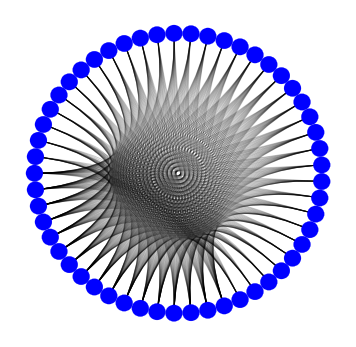

In [13]:
# Import necessary modules to use Circos plot
import matplotlib.pyplot as plt
from nxviz import CircosPlot 
from pylab import rcParams

# Create the CircosPlot object: c
c = CircosPlot(G)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()

## Grau de centralidade
Tentamos analisar um grafo de centralidade para ver os locais com uma maior quantidade de ligações, porém este grafo não teve uma boa visualização, devido a quantidade de palavras analisadas e o números de lugares em si, mas é possível ver a separação entre as duas categorias (locais e palavras).

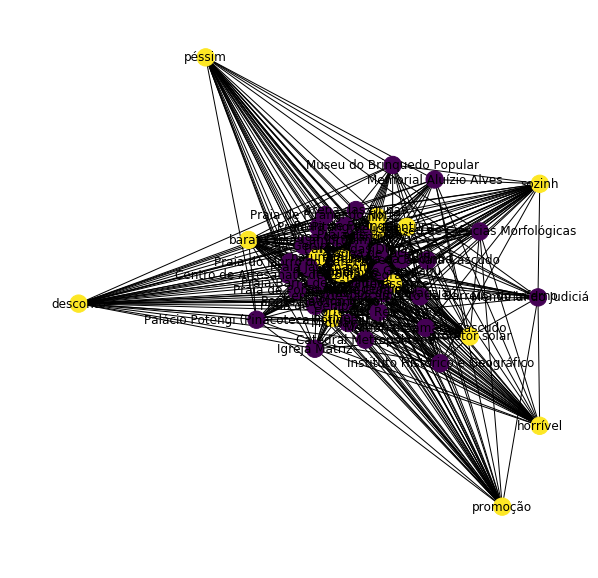

In [14]:
# Compute the degree centrality of the graph: deg_cent
deg_cent = nx.degree_centrality(G)


colors = [deg_cent[node] for node in G.nodes()]

plt.figure(figsize=(10,10))

nx.draw_networkx(G, node_color=colors, with_labels=True)

#print(deg_cent)


plt.axis('off')
plt.show()

In [15]:
#Retorna verdadeiro caso int2 esteja próximo de int2 em pct%, falso caso contrário
def rangeXPct(int1, int2, pct):
    limite = int1 * pct
    if limite < 1:
        limite = 1
    meio1 = False
    meio2 = False
    if int1 - limite <= int2:
        meio1 = True
    if int1 + limite >= int2:
        meio2 = True
    if meio1 and meio2:
        return True
    return False

#Retorna verdadeiro caso todas as palavras de ambos os lugares tenham uma quantia próxima
def lugarEmComum(strOriginal, strTestando, pct):
    for i in range(17):
        if not rangeXPct(Dados['\n' + strOriginal + '\n'][i], Dados['\n' + strTestando + '\n'][i], pct):
            return False
    return True

## Semelhança entre os locais
Criamos grafos de semelhança entre os locais, fazendo um cálculo para que dois locais só sejam unidos no grafo caso a quantidade de palavras associadas a eles se igualem dentro de um limite específico.

In [16]:
GLugares10Pct = nx.Graph()
GLugares40Pct = nx.Graph()
GLugares55Pct = nx.Graph()
GLugares70Pct = nx.Graph()
GLugares85Pct = nx.Graph()
GLugares95Pct = nx.Graph()

for column in Dados:
    column = column[1:-1]
    if column != "alavr":
        for column2 in Dados:
            column2 = column2[1:-1]
            if column2 != "alavr" and column2 != column:
                if lugarEmComum(column, column2,0.1):
                    GLugares10Pct.add_edge(column,column2)
                if lugarEmComum(column, column2,0.4):
                    GLugares40Pct.add_edge(column,column2)
                if lugarEmComum(column, column2,0.55):
                    GLugares55Pct.add_edge(column,column2)
                if lugarEmComum(column, column2,0.7):
                    GLugares70Pct.add_edge(column,column2)
                if lugarEmComum(column, column2,0.85):
                    GLugares85Pct.add_edge(column,column2)
                if lugarEmComum(column, column2,0.95):
                    GLugares95Pct.add_edge(column,column2)

## 90% de semelhança
Grafo de adjacência dos locais com no mínimo **90%** de semelhança entre as palavras relacionadas

#Nodes:  3
#Edges:  2


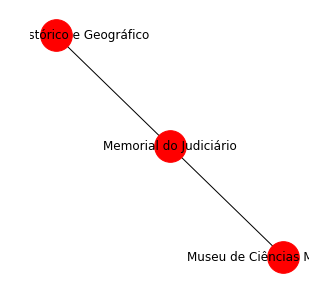

In [17]:
print('#Nodes: ', len(GLugares10Pct.nodes()))
print('#Edges: ', len(GLugares10Pct.edges()))

plt.figure(figsize=(5,5))

# Draw the subgraph to the screen
nx.draw_networkx(GLugares10Pct,pos=nx.spring_layout(GLugares10Pct), with_labels=True, node_size=1000)

plt.axis('off')
plt.show()

## 60% de semelhança
Grafo de adjacência dos locais com no mínimo **60%** de semelhança entre as palavras relacionadas

#Nodes:  7
#Edges:  4


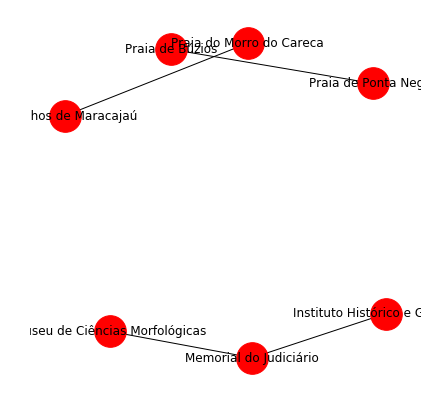

In [18]:
print('#Nodes: ', len(GLugares40Pct.nodes()))
print('#Edges: ', len(GLugares40Pct.edges()))

plt.figure(figsize=(7,7))

# Draw the subgraph to the screen
nx.draw_networkx(GLugares40Pct,pos=nx.spring_layout(GLugares40Pct), with_labels=True, node_size=1000)

plt.axis('off')
plt.show()

## 45% de semelhança
Grafo de adjacência dos locais com no mínimo **45%** de semelhança entre as palavras relacionadas

#Nodes:  12
#Edges:  7


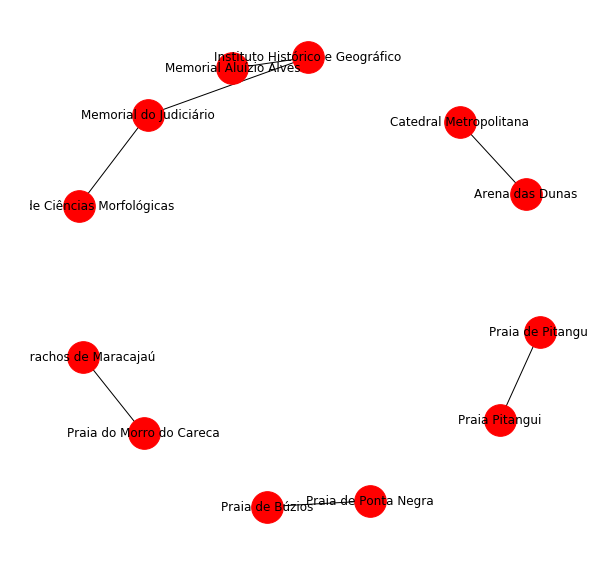

In [19]:
print('#Nodes: ', len(GLugares55Pct.nodes()))
print('#Edges: ', len(GLugares55Pct.edges()))

plt.figure(figsize=(10,10))

# Draw the subgraph to the screen
nx.draw_networkx(GLugares55Pct,pos=nx.spring_layout(GLugares55Pct), with_labels=True, node_size=1000)

plt.axis('off')
plt.show()

## 30% de semelhança
Grafo de adjacência dos locais com no mínimo **30%** de semelhança entre as palavras relacionadas

#Nodes:  19
#Edges:  16


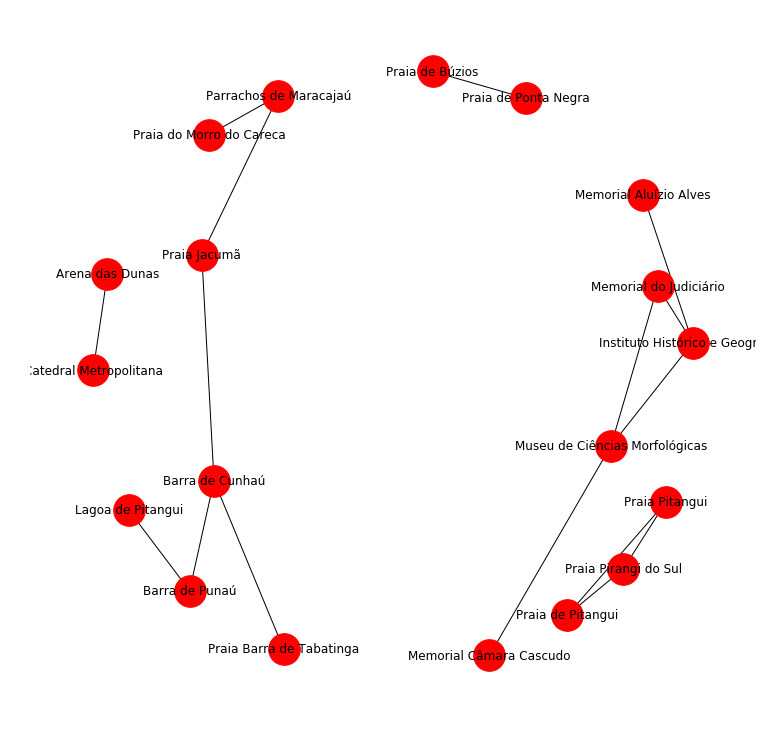

In [20]:
print('#Nodes: ', len(GLugares70Pct.nodes()))
print('#Edges: ', len(GLugares70Pct.edges()))

plt.figure(figsize=(13,13))

# Draw the subgraph to the screen
nx.draw_networkx(GLugares70Pct,pos=nx.spring_layout(GLugares70Pct), with_labels=True, node_size=1000)

plt.axis('off')
plt.show()

## 15% de semelhança
Grafo de adjacência dos locais com no mínimo **15%** de semelhança entre as palavras relacionadas

#Nodes:  26
#Edges:  31


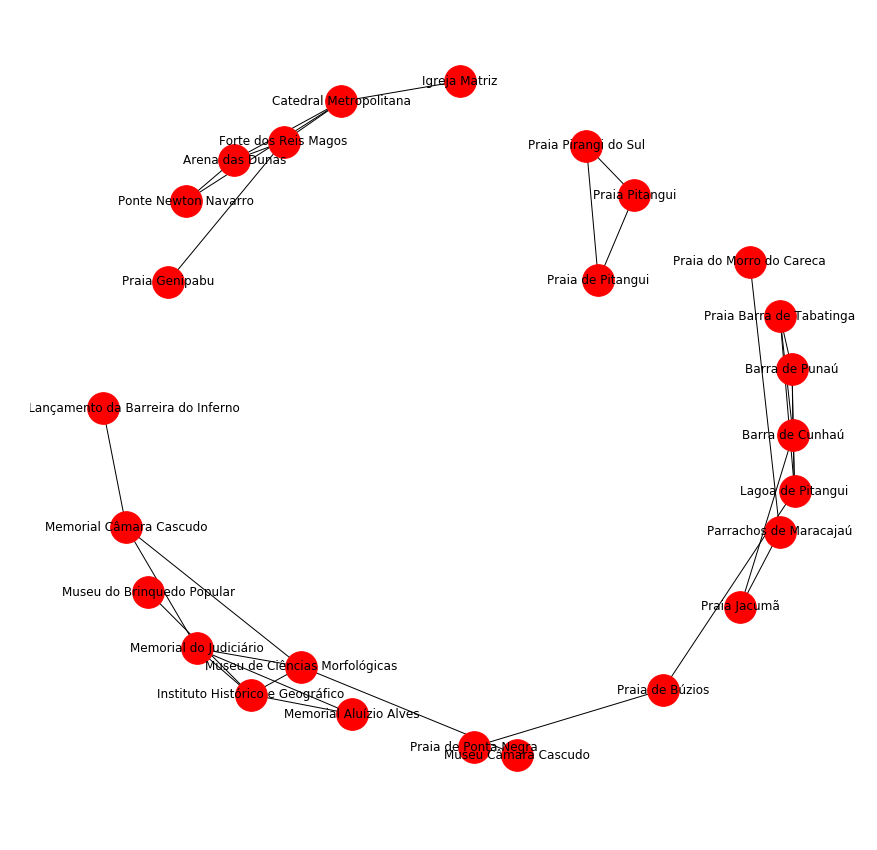

In [21]:
print('#Nodes: ', len(GLugares85Pct.nodes()))
print('#Edges: ', len(GLugares85Pct.edges()))

plt.figure(figsize=(15,15))

# Draw the subgraph to the screen
nx.draw_networkx(GLugares85Pct,pos=nx.spring_layout(GLugares85Pct), with_labels=True, node_size=1000)

plt.axis('off')
plt.show()

## 5% de semelhança
Grafo de adjacência dos locais com no mínimo **5%** de semelhança entre as palavras relacionadas

#Nodes:  27
#Edges:  43


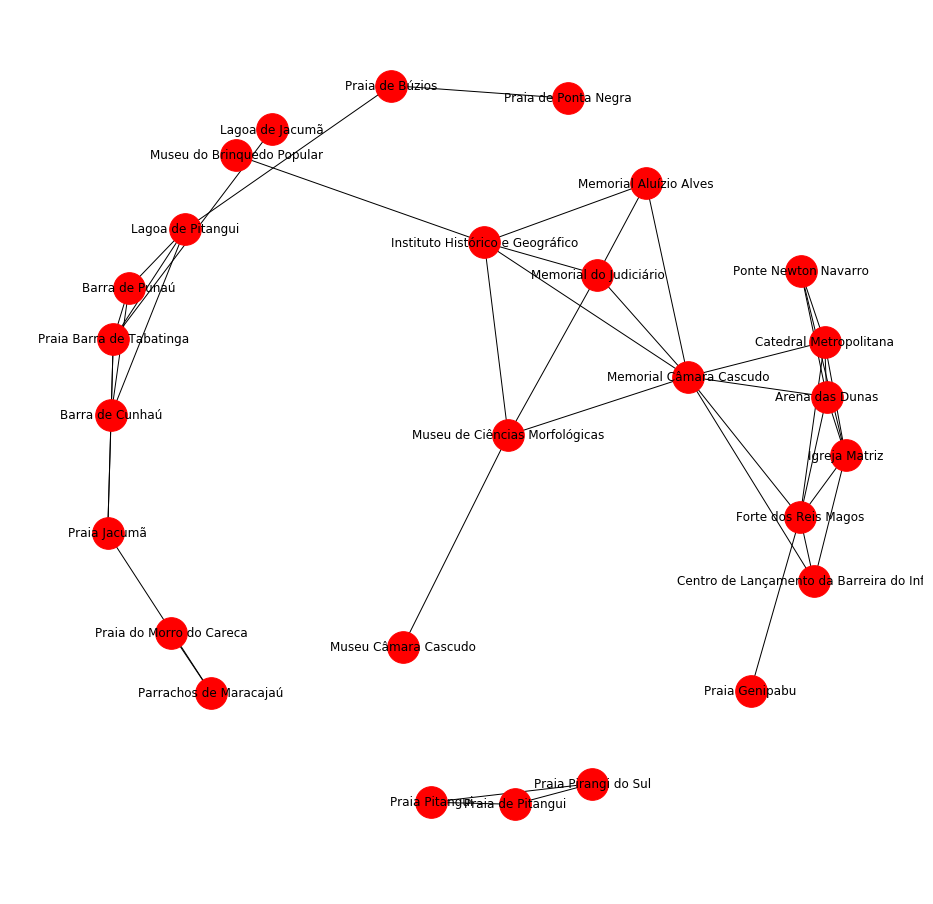

In [22]:
print('#Nodes: ', len(GLugares95Pct.nodes()))
print('#Edges: ', len(GLugares95Pct.edges()))

plt.figure(figsize=(16,16))

# Draw the subgraph to the screen
nx.draw_networkx(GLugares95Pct,pos=nx.spring_layout(GLugares95Pct), with_labels=True, node_size=1000)

plt.axis('off')
plt.show()

# Busca de Restaurante

Como as atrações possuiam endereços muito bagunçados, decidimos usar o de restaurantes no lugar

Esse codigo busca as categorias dos restaurantes e procura palavras nos comentários, dessa forma o usuário pode pesquisar por 
tipos de restaurante que ele tenha interesse(EX: Sushi, Bar, Pizza, etc) e verificar em qual desses restaurantes os comentários
mais falam das caracteristicas que ele deseja(EX: Bom, Barato, etc) e depois faz um top 3 dos restaurantes com maior pontuação e mostra no mapa onde eles ficam

In [23]:

from bs4 import BeautifulSoup
import requests


Url_Inicial2 = 'https://www.tripadvisor.com.br/Restaurants-g303518-Natal_State_of_Rio_Grande_do_Norte.html#EATERY_OVERVIEW_BOX'

In [24]:
def listar_links2():
    for atração in atrações2:
        url = atração.get('href')
        lista_das_URL2.append(url)
        
def pegar_as_paginas2():
    for a in lista_das_URL2:
        base = "https://www.tripadvisor.com.br"
        if(a.find("#REVIEWS") != -1):
            lista_das_atrações_URL2.append(base+a)
            
lista_das_URL2 = [] #versão bagunçada
lista_das_atrações_URL2 = []

response = requests.get(Url_Inicial2)
content = response.content
soup = BeautifulSoup(content, "html.parser")   
atrações2 = soup.find_all('a', href=True)
listar_links2()
pegar_as_paginas2()

In [25]:
#busca de comentarios e endereços nas paginas do site

listas_de_comentarios2 = []
lista_dos_comentarios2 = []
Nomes_das_atrações2 = []
Geocoding2=[]
categorias=[]
categorias.append("categoria")




enderecoValido=0
base = "https://www.tripadvisor.com.br"

Nomes_das_atrações2.append("Palavra")

for atração in lista_das_atrações_URL2:
    enderecoValido=0
    print(atração)
    Url2 = atração 
    response = requests.get(Url2)
    content = response.content
    soup = BeautifulSoup(content, "html.parser")
    nome = soup.find('h1', class_="heading_title")
    Nomes_das_atrações2.append(nome.text)
    #Nomes_das_atrações.append(nome.text)
    
    

    
    #tags=soup.find_all('span', class_="header_links rating_and_popularity")
    #categorias.append(tags)
    

    
    rua=soup.find_all('span', class_="street-address")
    extend=soup.find_all('span', class_="extended-address")
    local=soup.find_all('span', class_="locality")
    pais=soup.find_all('span', class_="country-name")
    #endereco=rua+extend+local+pais
    if(len(rua)>0 and len(extend)>0 and len(local)>0 and len(pais)>0 ):
        endereco=str(rua[0])+" "+str(extend[0])+" "+str(local[0])+" "+str(pais[0])
        #print(endereco)
        endereco=endereco.replace('<span class="street-address">', "")
        endereco=endereco.replace('</span>', "")
        endereco=endereco.replace('<span class="locality">', "")
        endereco=endereco.replace('<span class="extended-address">', "")
        endereco=endereco.replace('<span class="country-name">', "")
        #print(endereco)
    if(len(rua)<=0 and len(extend)>0 and len(local)>0 and len(pais)>0 ):
        endereco=str(extend[0])+" "+str(local[0])+" "+str(pais[0])
        #print(endereco)
        endereco=endereco.replace('<span class="street-address">', "")
        endereco=endereco.replace('</span>', "")
        endereco=endereco.replace('<span class="locality">', "")
        endereco=endereco.replace('<span class="extended-address">', "")
        endereco=endereco.replace('<span class="country-name">', "")
        #print(endereco)
        
    if(len(rua)>0 and len(extend)<=0 and len(local)>0 and len(pais)>0 ):
        endereco=str(rua[0])+" "+str(local[0])+" "+str(pais[0])
        #print(endereco)
        endereco=endereco.replace('<span class="street-address">', "")
        endereco=endereco.replace('</span>', "")
        endereco=endereco.replace('<span class="locality">', "")
        endereco=endereco.replace('<span class="extended-address">', "")
        endereco=endereco.replace('<span class="country-name">', "")
        #print(endereco)
    if(len(rua)>0 and len(extend)>0 and len(local)<=0 and len(pais)>0 ):
        endereco=str(rua[0])+" "+str(extend[0])+" "+str(pais[0])
        #print(endereco)
        endereco=endereco.replace('<span class="street-address">', "")
        endereco=endereco.replace('</span>', "")
        endereco=endereco.replace('<span class="locality">', "")
        endereco=endereco.replace('<span class="extended-address">', "")
        endereco=endereco.replace('<span class="country-name">', "")
        #print(endereco)
    if(len(rua)>0 and len(extend)>0 and len(local)>0 and len(pais)<=0 ):
        endereco=str(rua[0])+" "+str(extend[0])+" "+str(local[0])
        #print(endereco)
        endereco=endereco.replace('<span class="street-address">', "")
        endereco=endereco.replace('</span>', "")
        endereco=endereco.replace('<span class="locality">', "")
        endereco=endereco.replace('<span class="extended-address">', "")
        endereco=endereco.replace('<span class="country-name">', "")
        #print(endereco)
    if(len(rua)<=0 and len(extend)<=0 and len(local)>0 and len(pais)>0 ):
        endereco=str(local[0])+" "+str(pais[0])
        #print(endereco)
        endereco=endereco.replace('<span class="street-address">', "")
        endereco=endereco.replace('</span>', "")
        endereco=endereco.replace('<span class="locality">', "")
        endereco=endereco.replace('<span class="extended-address">', "")
        endereco=endereco.replace('<span class="country-name">', "")
        #print(endereco)
    if(len(rua)<=0 and len(extend)>0 and len(local)<=0 and len(pais)>0 ):
        endereco=str(extend[0])+" "+str(pais[0])
        #print(endereco)
        endereco=endereco.replace('<span class="street-address">', "")
        endereco=endereco.replace('</span>', "")
        endereco=endereco.replace('<span class="locality">', "")
        endereco=endereco.replace('<span class="extended-address">', "")
        endereco=endereco.replace('<span class="country-name">', "")
        #print(endereco)
    if(len(rua)<=0 and len(extend)>0 and len(local)>0 and len(pais)<=0 ):
        endereco=str(extend[0])+" "+str(local[0])
        
    if(len(rua)<=0 and len(extend)<=0 and len(local)<=0 and len(pais)>0 ):
        endereco=str(extend[0])+" "+str(local[0])
    if(endereco in Geocoding2):
        #print("Já Existe")
        enderecoValido=1
    else:
        Geocoding2.append(endereco)
    
    for i in range(50):
        try:
        
            response = requests.get(Url2)
            content = response.content
            soup = BeautifulSoup(content, "html.parser")
            comentario = soup.find_all('p', class_="partial_entry")
            
            for c in comentario:
                lista_dos_comentarios2.append(c.text)
            proxima = soup.find('a', class_="nav next arrowNav taLnk")
            print(Url2)

            Url2 = base + proxima.get('href')
            #print(i)
        except AttributeError:
            break
    if(enderecoValido==0):
        teste8=soup.find_all('div', class_="text")
        #print(teste8)
        teste8=str(teste8)
        
        teste8=teste8.replace('<div class="text">O TripAdvisor concede um Certificado de Excelência às acomodações, atrações e restaurantes que recebem avaliações excelentes dos viajantes com frequência.</div>,', "")
        teste8=teste8.replace('<div class="text">Busque horários disponíveis para este restaurante</div>', "")
        teste8=teste8.replace('<div class="text">Buscando horários disponíveis… </div>', "")
        teste8=teste8.replace('</div>', "")
        teste8=teste8.replace('<div class="text">', "")
        teste8=teste8.replace(', \nBuscando horários disponíveis… ', "")
        teste8=teste8.replace('Este é o nosso maior prêmio, concedido anualmente para os top 1% dos estabelecimentos em categorias selecionadas.,', "")
        teste8=teste8.replace('O TripAdvisor concede um Certificado de Excelência às acomodações, atrações e restaurantes que recebem avaliações excelentes dos viajantes com frequência.', "")


        if(teste8==""):
            categorias.append("Nao Declarado")
        else:
            categorias.append(teste8)
        
        
        
        
        
    print("pegou uma lista de: " + atração)
    listas_de_comentarios2.append(lista_dos_comentarios2)
    lista_dos_comentarios2 = []

https://www.tripadvisor.com.br/Restaurant_Review-g303518-d4605710-Reviews-La_Brasserie_de_La_Mer-Natal_State_of_Rio_Grande_do_Norte.html#REVIEWS
https://www.tripadvisor.com.br/Restaurant_Review-g303518-d4605710-Reviews-La_Brasserie_de_La_Mer-Natal_State_of_Rio_Grande_do_Norte.html#REVIEWS
https://www.tripadvisor.com.br/Restaurant_Review-g303518-d4605710-Reviews-or10-La_Brasserie_de_La_Mer-Natal_State_of_Rio_Grande_do_Norte.html#REVIEWS
https://www.tripadvisor.com.br/Restaurant_Review-g303518-d4605710-Reviews-or20-La_Brasserie_de_La_Mer-Natal_State_of_Rio_Grande_do_Norte.html#REVIEWS
https://www.tripadvisor.com.br/Restaurant_Review-g303518-d4605710-Reviews-or30-La_Brasserie_de_La_Mer-Natal_State_of_Rio_Grande_do_Norte.html#REVIEWS
https://www.tripadvisor.com.br/Restaurant_Review-g303518-d4605710-Reviews-or40-La_Brasserie_de_La_Mer-Natal_State_of_Rio_Grande_do_Norte.html#REVIEWS
https://www.tripadvisor.com.br/Restaurant_Review-g303518-d4605710-Reviews-or50-La_Brasserie_de_La_Mer-Natal_St

In [26]:
categorias


['categoria',
 '[  Internacional, Francesa, Europeia ]',
 '[  Brasileira, Frutos do mar, Sul-americana ]',
 '[  Japonesa, Fusion, Frutos do mar, Sushi, Adequado para vegetarianos ]',
 '[  Brasileira, Frutos do mar, Mediterrânea, Sul-americana, Opções sem glúten ]',
 '[  Saudável ]',
 '[ Brasileira, Frutos do mar, Sul-americana ]',
 '[  Libanesa, Oriente Médio ]',
 '[  Brasileira, Sul-americana ]',
 '[ ,  Italiana, Pizza ]',
 '[,  Japonesa, Peruana ]',
 '[]',
 '[]',
 '[  Brasileira, Bar, Frutos do mar, Sul-americana ]',
 '[  Steakhouse, Brasileira, Churrasco, Sushi ]',
 '[  Brasileira, Café, Sul-americana, Delicatessen ]',
 '[  Brasileira, Sul-americana ]',
 '[  Brasileira, Frutos do mar, Sul-americana, Opções sem glúten ]',
 '[  Brasileira, Sul-americana, Frutos do mar, Adequado para vegetarianos, Opções sem glúten ]',
 '[  Brasileira, Frutos do mar, Sul-americana, Internacional ]',
 '[  Sul-americana, Brasileira ]',
 '[  Brasileira, Adequado para vegetarianos, Opções sem glúten ]',
 '

In [27]:
lista_de_termos2 = []
lista_de_termos2.append("incrível")
lista_de_termos2.append("maravilhos")
lista_de_termos2.append("pessim")
lista_de_termos2.append("horrivel")
lista_de_termos2.append("caro")
lista_de_termos2.append("barato")
lista_de_termos2.append("bom")
lista_de_termos2.append("delicios")
lista_de_termos2.append("família")
lista_de_termos2.append("promoção")
lista_de_termos2.append("desconto")
lista_de_termos2.append("sozinh")
lista_de_termos2.append("diferente")
lista_de_termos2.append("agradável")

In [28]:
lista_de_categorias = []
lista_de_categorias.append("Sul-americana")
lista_de_categorias.append("Brasileira")
lista_de_categorias.append("Frutos do mar")
lista_de_categorias.append("Contemporânea")
lista_de_categorias.append("Internacional")
lista_de_categorias.append("Italiana")
lista_de_categorias.append("Pizza")
lista_de_categorias.append("Australiana")
lista_de_categorias.append("Steakhouse")
lista_de_categorias.append("Bar")
lista_de_categorias.append("Pub ")
lista_de_categorias.append("Japonesa")
lista_de_categorias.append("Sushi")
lista_de_categorias.append("Asiática")
lista_de_categorias.append("Fusion")
lista_de_categorias.append("Adequado para vegetarian")
lista_de_categorias.append("Churrasco")
lista_de_categorias.append("Grelhados")
lista_de_categorias.append("Opções sem glúten")
lista_de_categorias.append("Opções veganas")
lista_de_categorias.append("Peruana")
lista_de_categorias.append("Libanesa")
lista_de_categorias.append("Libanesa")
lista_de_categorias.append("Oriente Médio")
lista_de_categorias.append("Saudável")
lista_de_categorias.append("Mediterrânea")
lista_de_categorias.append("Francesa")
lista_de_categorias.append("Europeia")

In [29]:
lista_de_categorias

['Sul-americana',
 'Brasileira',
 'Frutos do mar',
 'Contemporânea',
 'Internacional',
 'Italiana',
 'Pizza',
 'Australiana',
 'Steakhouse',
 'Bar',
 'Pub ',
 'Japonesa',
 'Sushi',
 'Asiática',
 'Fusion',
 'Adequado para vegetarian',
 'Churrasco',
 'Grelhados',
 'Opções sem glúten',
 'Opções veganas',
 'Peruana',
 'Libanesa',
 'Libanesa',
 'Oriente Médio',
 'Saudável',
 'Mediterrânea',
 'Francesa',
 'Europeia']

In [30]:
#processamento de comentarios

listas_de_resultados2 = []
lista_de_resultados2 = []
i = 0

for termo in lista_de_termos2:
    lista_de_resultados2.append(termo)
    for lista in listas_de_comentarios2:
        contador = 0
        for comentario in lista:
            if(comentario.find(termo) != -1):
                contador+=1
        lista_de_resultados2.append(contador)
    listas_de_resultados2.append(lista_de_resultados2)
    lista_de_resultados2 = []

#print(listas_de_resultados2)


In [31]:
import pandas as pd
DadosRes = pd.DataFrame.from_records(listas_de_resultados2, columns=Nomes_das_atrações2)

DadosRes = DadosRes.loc[:,~DadosRes.columns.duplicated()]


DadosRes.to_csv("restaurante.csv",index=False, sep=",",  encoding='utf-8')

In [32]:
DadosRes

,Palavra,La Brasserie de La Mer,Manary,Lotus Japanese Fusion Cuisine,Nau Frutos Do Mar,Açaí do Joca Jr,Mango Restaurante,Rachid's,Tapiocaria Tropical,Piazzale Itália,...,Pinga Fogo,Mina D'água,Takami Sushi - Ponta negra,Curva do Vento,Outback Steakhouse,Paçoca de Pilão,Pizzaria Reis Magos,Pacifico,Famiglia Reis Magos,A Cozinharia
0,incrível,8,9,6,19,2,0,1,0,3,...,6,1,4,4,0,2,2,4,2,3
1,maravilhos,64,62,34,83,7,8,14,1,33,...,30,21,17,22,36,23,24,10,19,30
2,pessim,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,horrivel,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,caro,12,20,8,8,1,7,3,0,7,...,31,1,4,1,11,6,1,0,5,13
5,barato,2,8,4,5,6,18,1,0,1,...,14,1,2,0,11,4,3,0,1,4
6,bom,64,95,56,110,55,105,36,6,86,...,111,28,37,60,93,56,83,31,59,86
7,delicios,73,60,27,54,14,27,19,13,44,...,36,24,23,43,43,41,44,12,36,54
8,família,3,7,9,15,5,3,3,0,9,...,15,4,1,7,10,3,19,2,15,11
9,promoção,0,0,0,0,2,0,0,0,0,...,0,0,0,0,2,0,25,0,9,0


In [33]:
DadosRes2=DadosRes.T

In [34]:
#Geocoding2

In [35]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib
import folium
import geocoder
from tqdm import tqdm
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)






Populating the interactive namespace from numpy and matplotlib


C:\Users\hjuni\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [36]:
DadosRes2['lat'], DadosRes2['long'] = [0, 0]

In [37]:
#geocoding dos restaurantes
j=0;
for i in Geocoding2:     
    
    g = geocoder.google(i)
    DadosRes2.ix[j+1,'lat'] = g.lat
    DadosRes2.ix[j+1,'long'] = g.lng
    j+=1

print('Geocoding complete!')

Geocoding complete!


In [38]:
#colocando categorias no panda
DadosRes2['categoria']=categorias

In [39]:
categorias

['categoria',
 '[  Internacional, Francesa, Europeia ]',
 '[  Brasileira, Frutos do mar, Sul-americana ]',
 '[  Japonesa, Fusion, Frutos do mar, Sushi, Adequado para vegetarianos ]',
 '[  Brasileira, Frutos do mar, Mediterrânea, Sul-americana, Opções sem glúten ]',
 '[  Saudável ]',
 '[ Brasileira, Frutos do mar, Sul-americana ]',
 '[  Libanesa, Oriente Médio ]',
 '[  Brasileira, Sul-americana ]',
 '[ ,  Italiana, Pizza ]',
 '[,  Japonesa, Peruana ]',
 '[]',
 '[]',
 '[  Brasileira, Bar, Frutos do mar, Sul-americana ]',
 '[  Steakhouse, Brasileira, Churrasco, Sushi ]',
 '[  Brasileira, Café, Sul-americana, Delicatessen ]',
 '[  Brasileira, Sul-americana ]',
 '[  Brasileira, Frutos do mar, Sul-americana, Opções sem glúten ]',
 '[  Brasileira, Sul-americana, Frutos do mar, Adequado para vegetarianos, Opções sem glúten ]',
 '[  Brasileira, Frutos do mar, Sul-americana, Internacional ]',
 '[  Sul-americana, Brasileira ]',
 '[  Brasileira, Adequado para vegetarianos, Opções sem glúten ]',
 '

In [40]:
DadosRes2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,lat,long,categoria
Palavra,incrível,maravilhos,pessim,horrivel,caro,barato,bom,delicios,família,promoção,desconto,sozinh,diferente,agradável,0.000000,0.000000,categoria
\nLa Brasserie de La Mer\n,8,64,0,0,12,2,64,73,3,0,0,1,10,55,-5.871097,-35.181312,"[ Internacional, Francesa, Europeia ]"
\nManary\n,9,62,1,0,20,8,95,60,7,0,0,0,12,82,-5.873845,-35.177344,"[ Brasileira, Frutos do mar, Sul-americana ]"
\nLotus Japanese Fusion Cuisine\n,6,34,0,0,8,4,56,27,9,0,0,0,11,38,NaN,NaN,"[ Japonesa, Fusion, Frutos do mar, Sushi, Ade..."
\nNau Frutos Do Mar\n,19,83,0,0,8,5,110,54,15,0,0,1,8,60,-5.846385,-35.199553,"[ Brasileira, Frutos do mar, Mediterrânea, Su..."
\nAçaí do Joca Jr\n,2,7,0,0,1,6,55,14,5,2,1,0,2,17,-5.874863,-35.180894,[ Saudável ]
\nMango Restaurante\n,0,8,0,0,7,18,105,27,3,0,0,0,4,34,-5.882995,-35.169689,"[ Brasileira, Frutos do mar, Sul-americana ]"
\nRachid's\n,1,14,0,1,3,1,36,19,3,0,0,1,9,22,-5.881170,-35.179243,"[ Libanesa, Oriente Médio ]"
\nTapiocaria Tropical\n,0,1,0,0,0,0,6,13,0,0,0,0,2,6,-5.783161,-35.192424,"[ Brasileira, Sul-americana ]"
\nPiazzale Itália\n,3,33,0,1,7,1,86,44,9,0,0,0,2,81,-5.883337,-35.182586,"[ , Italiana, Pizza ]"


In [41]:
#buscando pelas categorias desejadas
categoriasDesejadas=[]
categoriasDesejadas=["Brasileira","Italiana"]



tagsRelacionadas=0


linhasArmazenadas=[]
dadosArmazenados=[]


for i in range(len(DadosRes2.index)-1):
    dadosArmazenados=[]
    tagsRelacionadas=0

    auxiliarString=str(DadosRes2["categoria"][i+1])
    dadosArmazenados.append(DadosRes2.index[i+1])
    #dadosArmazenados.append(DadosRes2["categoria"][i+1])
    
    for j in categoriasDesejadas:
        if(j in auxiliarString):
            tagsRelacionadas+=1
    
    dadosArmazenados.append(tagsRelacionadas/len(categoriasDesejadas))
    dadosArmazenados.append(str(DadosRes2["lat"][i+1]))
    dadosArmazenados.append(str(DadosRes2["long"][i+1]))


    linhasArmazenadas.append(dadosArmazenados)    










In [42]:
#buscando pelas palavras desejadas e pontuando baseado na pontuação das categorias

PalavrasDesejadas=["bom","barato"]

total=0
totais=[]

lista_de_termos2

for i in range(len(DadosRes2.index)-1):
    total=0;
    for j in range(len(lista_de_termos2)):
        nome=DadosRes2[j][0]
        palavra=DadosRes2[j][i+1]
        
        if nome in PalavrasDesejadas:
            total=total+palavra
        

    multiplicador=linhasArmazenadas[i][1]*total

    totais.append(total)
    linhasArmazenadas[i].append(multiplicador)
    
    
   

In [43]:
#rankeando os restaurantes

import copy

linhasArmazenadasCopia=copy.deepcopy(linhasArmazenadas)
top3=[]
pontosMaximos=0
indiceMaximo=0
nome=""




for i in range(3):
    pontosMaximos=0
    indiceMaximo=0
    nome=""
    for j in range(len(linhasArmazenadasCopia)):
        if (linhasArmazenadasCopia[j][4]>pontosMaximos):
            pontosMaximos=linhasArmazenadasCopia[j][4]
            indiceMaximo=j
            nome=linhasArmazenadasCopia[j][0]
    print(str(i+1)+"º lugar")
    print(nome)
    top3.append(linhasArmazenadasCopia[indiceMaximo])
    del linhasArmazenadasCopia[indiceMaximo]

    

        
        
    

1º lugar

Paprika Restaurante e Pizzaria

2º lugar

Restaurante E Pizzaria Mazzano

3º lugar

Pinga Fogo



In [44]:
#mostrando no mapa
#Verde 1º Lugar
#Azul 2º Lugar
#Vermelho 3º Lugar
mapc = [0, 30]
zoom = 2

# Create map object
map_osm = folium.Map(location=mapc,
                    zoom_start=zoom)
# Plot each of the locations that we geocoded
i=0
bogus=0

import math
x=float('nan')
math.isnan(x)
for j in top3:
    lat=top3[i][2]
    long=top3[i][3]
    if(i==0):
        folium.Marker([lat,long],
            icon=folium.Icon(color='green',icon='info-sign')
            ).add_to(map_osm)
    if(i==1):
        folium.Marker([lat,long],
            icon=folium.Icon(color='blue',icon='info-sign')
            ).add_to(map_osm)
    if(i==2):
        folium.Marker([lat,long],
            icon=folium.Icon(color='red',icon='info-sign')
            ).add_to(map_osm)
    i+=1;
# Show the map
map_osm